In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from lazypredict.Supervised import LazyRegressor


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\modelling\kolektor\regresi_for_time\data\kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   time_to_collect           1000 non-null   int64  
 2   avg_bill_methods          1000 non-null   object 
 3   debtor_volume_handled     1000 non-null   int64  
 4   bill_amount_collected     1000 non-null   int64  
 5   total_actual              1000 non-null   int64  
 6   total_cost                1000 non-null   int64  
 7   success_rate              1000 non-null   float64
 8   collector_age             1000 non-null   int64  
 9   collector_marital_status  1000 non-null   object 
 10  collector_gender          1000 non-null   object 
 11  negotiation_skills        1000 non-null   object 
 12  collector_experience      1000 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 101.7+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,collector_age,collector_marital_status,collector_gender,negotiation_skills,collector_experience
0,0,sms or WA,7,14400000,35700000,277706,40.00,45,Menikah,laki-laki,Baik,4
1,11,panggilan,35,79000000,160500000,22382611,49.00,32,Cerai mati,perempuan,Buruk,0
2,4,sms or WA,6,7100000,26700000,205389,27.00,62,Cerai hidup,laki-laki,Buruk,0
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.00,55,Cerai mati,perempuan,Cukup baik,2
4,22,datang ke tempat,35,346000000,485500000,151035603,71.00,53,Menikah,perempuan,Cukup baik,2


In [5]:
df["total_cost"].describe()

count        1000.00
mean    139633105.12
std     166600490.67
min         25263.00
25%       1928856.50
50%      62215627.00
75%     247064723.00
max     678041154.00
Name: total_cost, dtype: float64

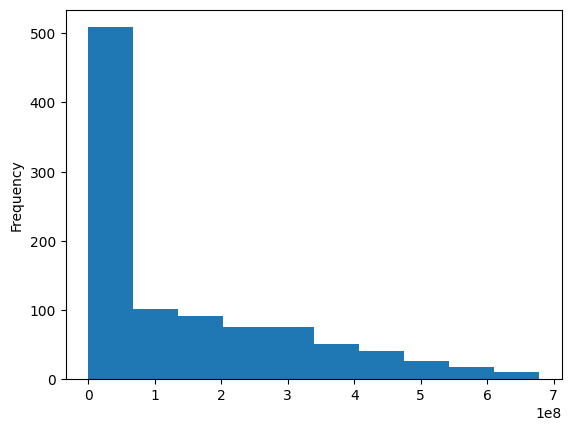

In [6]:
df["total_cost"].plot.hist()
plt.show()

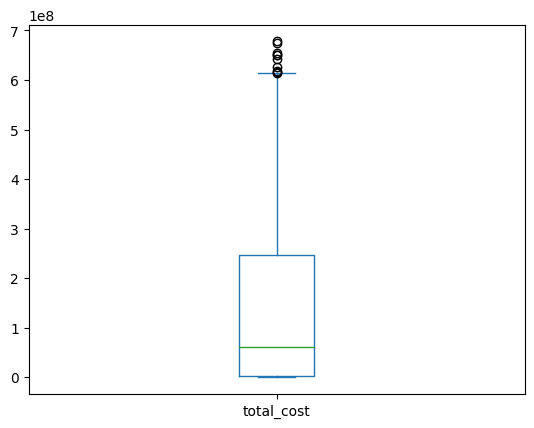

In [7]:
df["total_cost"].plot.box()
plt.show()

In [8]:
Q1 = np.quantile(df["total_cost"], .25)
Q3 = np.quantile(df["total_cost"], .75)

IQR = Q3 - Q1
min_IQR = Q1 - 1.5*IQR
max_IQR = Q3 + 1.5*IQR

low_outlier = [i for i in df["total_cost"] if i < min_IQR]
high_outlier = [i for i in df["total_cost"] if i > max_IQR]
for i in range(len(df)):
    if df.loc[i, "total_cost"] in low_outlier or df.loc[i, "total_cost"] in high_outlier:
        df.drop(i, axis=0, inplace=True)

df.shape
        

(990, 12)

In [9]:
df["total_cost"].describe()

count         990.00
mean    134554330.17
std     159528948.49
min         25263.00
25%       1908808.00
50%      59891791.00
75%     236438599.75
max     614113785.00
Name: total_cost, dtype: float64

In [10]:
df["avg_bill_methods"].value_counts()

avg_bill_methods
datang ke tempat    471
sms or WA           198
panggilan           162
surat panggilan     159
Name: count, dtype: int64

In [11]:
bill_methods = LabelEncoder().fit(df["avg_bill_methods"].to_numpy().reshape(-1, 1))
gender = LabelEncoder().fit(df["collector_gender"].to_numpy().reshape(-1, 1))
mart = LabelEncoder().fit(df["collector_marital_status"].to_numpy().reshape(-1, 1))
nego = LabelEncoder().fit(df["negotiation_skills"].to_numpy().reshape(-1, 1))
df2 = pd.DataFrame()

df2["avg_bill_methods"] = bill_methods.transform(df["avg_bill_methods"])
df2["collector_gender"] = gender.transform(df["collector_gender"])
df2["collector_marital_status"] = mart.transform(df["collector_marital_status"])
df2["negotiation_skills"] = nego.transform(df["negotiation_skills"])
           
scaler = RobustScaler().fit(df[["bill_amount_collected", "total_actual"]])
df2[["bill_amount_collected", "total_actual"]] = scaler.transform(df[["bill_amount_collected", "total_actual"]])
df2[["debtor_volume_handled", "collector_age", "success_rate", "time_to_collect"]] = df[["debtor_volume_handled", "collector_age", "success_rate", "time_to_collect"]]
y = df["total_cost"]
df2.head(5)

,avg_bill_methods,collector_gender,collector_marital_status,negotiation_skills,bill_amount_collected,total_actual,debtor_volume_handled,collector_age,success_rate,time_to_collect
0,2,0,3,0,-0.46,-0.53,7.00,45.00,40.00,0.00
1,1,1,2,1,-0.28,-0.35,35.00,32.00,49.00,11.00
2,2,0,1,1,-0.48,-0.54,6.00,62.00,27.00,4.00
3,0,1,2,2,1.67,1.42,63.00,55.00,56.00,29.00
4,0,1,3,2,0.46,0.12,35.00,53.00,71.00,22.00


In [12]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

  5%|▍         | 2/42 [00:00<00:06,  5.84it/s]

100%|██████████| 42/42 [00:05<00:00,  7.11it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 792, number of used features: 10
[LightGBM] [Info] Start training from score 129413795.272727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.62,0.64,100913433.89,0.02
AdaBoostRegressor,0.61,0.63,102252033.40,0.15
ExtraTreesRegressor,0.60,0.62,104101254.18,0.71
RandomForestRegressor,0.59,0.61,105142871.33,1.35
GradientBoostingRegressor,0.57,0.59,107539752.40,0.37
OrthogonalMatchingPursuitCV,0.57,0.59,108320091.16,0.02
LGBMRegressor,0.57,0.59,108356601.96,0.11
LassoLars,0.56,0.59,108461512.93,0.02
Lasso,0.56,0.59,108461513.00,0.01


### Build new data

In [13]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\modelling\kolektor\regresi_for_time\data\kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   time_to_collect           1000 non-null   int64  
 2   avg_bill_methods          1000 non-null   object 
 3   debtor_volume_handled     1000 non-null   int64  
 4   bill_amount_collected     1000 non-null   int64  
 5   total_actual              1000 non-null   int64  
 6   total_cost                1000 non-null   int64  
 7   success_rate              1000 non-null   float64
 8   collector_age             1000 non-null   int64  
 9   collector_marital_status  1000 non-null   object 
 10  collector_gender          1000 non-null   object 
 11  negotiation_skills        1000 non-null   object 
 12  collector_experience      1000 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 101.7+ KB


In [14]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [15]:
bill_methods = [] # metode penagihan
bill_amount_collected = [] # jumlah tagihan yang dikumpulkan
total_actual = [] # Jumlah tagihan minimal yang seharusnya
debt_sum = [] # jumlah debitur yang ditangani
total_cost = [] # biaya untuk pengananan debitur oleh debt kolektor
success_rate = [] # jumlah kesuksesan dalam penagihan
time_to_collect = np.random.randint(0, 5, 1200)
time = [i for i in time_to_collect]
for i in range(len(time_to_collect)):
    bill_methods.append("sms or WA")
    debt = np.random.randint(1, 20)
    debt_sum.append(debt)
    total = np.random.choice(np.arange(500000*(debt), 10000000*debt, 100000))
    total_actual.append(total)
    total_cost.append(np.random.randint(10000*debt, 50000*(debt+1)))
    bill = np.random.choice(np.arange(400000*(debt), total_actual[-1]+100000, 100000))
    bill_amount_collected.append(bill)
    number = float(f"{bill/total:.2f}") * 100
    success_rate.append(number)

time_to_collect = np.random.randint(6, 10, 1200)
for i in range(len(time_to_collect)):
    time.append(time_to_collect[i])
    bill_methods.append("surat panggilan")
    debt = np.random.randint(20, 40)
    debt_sum.append(debt)
    total = np.random.choice(np.arange(1000000*(debt), 15000000*debt, 500000))
    total_actual.append(total)
    total_cost.append(np.random.randint(50000*debt, 100000*(debt+1)))
    bill = np.random.choice(np.arange(500000*(debt), total_actual[-1]+500000, 500000))
    bill_amount_collected.append(bill)
    number = float(f"{bill/total:.2f}") * 100
    success_rate.append(number)
    

time_to_collect = np.random.randint(11, 15, 1200)
for i in range(len(time_to_collect)):
    time.append(time_to_collect[i])
    bill_methods.append("panggilan")
    debt = np.random.randint(30, 50)
    debt_sum.append(debt)
    total = np.random.choice(np.arange(1500000*(debt), 20000000*debt, 1000000))
    total_actual.append(total)
    total_cost.append(np.random.randint(200000*debt, 2000000*(debt+1)))
    bill = np.random.choice(np.arange(1000000*(debt), total_actual[-1]+1000000, 1000000))
    bill_amount_collected.append(bill)
    number = float(f"{bill/total:.2f}") * 100
    success_rate.append(number)

time_to_collect = np.random.randint(11, 15, 400)
for i in range(len(time_to_collect)):
    time.append(time_to_collect[i])
    bill_methods.append("datang ke tempat")
    debt = np.random.randint(40, 60)
    debt_sum.append(debt)
    total = np.random.choice(np.arange(2000000*(debt), 35000000*debt, 1500000))
    total_actual.append(total)
    total_cost.append(np.random.randint(1000000*debt, 10000000*(debt+1)))
    bill = np.random.choice(np.arange(2000000*(debt), total_actual[-1]+2000000, 2000000))
    bill_amount_collected.append(bill)
    number = float(f"{bill/total:.2f}") * 100
    success_rate.append(number)

negotiation_skills = []
collector_experience = []
for i in range(1000):
    if df.loc[i, "success_rate"] >= 60 and df.loc[i, "debtor_volume_handled"] >= 15 and df.loc[i, "time_to_collect"] <= 15:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    elif df.loc[i, "success_rate"] >= 60 and df.loc[i, "debtor_volume_handled"] >= 15 and df.loc[i, "time_to_collect"] > 15:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif df.loc[i, "success_rate"] >= 60 and df.loc[i, "debtor_volume_handled"] < 15 and df.loc[i, "time_to_collect"] <= 10:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    elif df.loc[i, "success_rate"] >= 40 and df.loc[i, "debtor_volume_handled"] < 15 and df.loc[i, "time_to_collect"] > 10:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif df.loc[i, "success_rate"] >= 40 and df.loc[i, "debtor_volume_handled"] >= 15 and df.loc[i, "time_to_collect"] > 15:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif df.loc[i, "success_rate"] >= 40 and df.loc[i, "debtor_volume_handled"] < 15 and df.loc[i, "time_to_collect"] <= 10:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    else:
        collector_experience.append(np.random.randint(0, 1))
        negotiation_skills.append("Buruk")

for i in range(4000):
    if success_rate[i] >= 60 and debt_sum[i] >= 15 and time[i] <= 15:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    elif success_rate[i] >= 60 and debt_sum[i] >= 15 and time[i] > 15:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif success_rate[i] >= 60 and debt_sum[i] < 15 and time[i] <= 10:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Baik")
    elif success_rate[i] >= 40 and debt_sum[i] < 15 and time[i] > 10:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif success_rate[i] >= 40 and debt_sum[i] >= 15 and time[i] <= 10:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    else:
        collector_experience.append(np.random.randint(0, 1))
        negotiation_skills.append("Buruk")
    
age = np.random.randint(23, 61, 4000)

df_kolektor = pd.DataFrame()
df_kolektor["avg_bill_methods"] = bill_methods
df_kolektor["debtor_volume_handled"] = debt_sum
df_kolektor["bill_amount_collected"] = bill_amount_collected
df_kolektor["total_actual"] = total_actual
df_kolektor["total_cost"] = total_cost
df_kolektor["success_rate"] = success_rate
df_kolektor["time_to_collect"] = time
gender = [i for i in df["collector_gender"]] * 4
marital = [i for i in df["collector_marital_status"]] * 4
df_kolektor["collector_gender"] = gender
df_kolektor["collector_marital_status"] = marital
df_kolektor["collector_age"] = age

df = pd.concat([df, df_kolektor], ignore_index=True)
df["negotiation_skills"] = negotiation_skills
df["collector_experience"] = collector_experience

df.head()

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,collector_age,collector_marital_status,collector_gender,negotiation_skills,collector_experience
0,0,sms or WA,7,14400000,35700000,277706,40.00,45,Menikah,laki-laki,Baik,4
1,11,panggilan,35,79000000,160500000,22382611,49.00,32,Cerai mati,perempuan,Buruk,0
2,4,sms or WA,6,7100000,26700000,205389,27.00,62,Cerai hidup,laki-laki,Buruk,0
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.00,55,Cerai mati,perempuan,Cukup baik,2
4,22,datang ke tempat,35,346000000,485500000,151035603,71.00,53,Menikah,perempuan,Cukup baik,2


In [16]:
df.to_csv("./data/data2.csv")

In [17]:
df.shape

(5000, 12)

### Train again

In [18]:
bill_methods = LabelEncoder().fit(df["avg_bill_methods"].to_numpy().reshape(-1, 1))
gender = LabelEncoder().fit(df["collector_gender"].to_numpy().reshape(-1, 1))
mart = LabelEncoder().fit(df["collector_marital_status"].to_numpy().reshape(-1, 1))
nego = LabelEncoder().fit(df["negotiation_skills"].to_numpy().reshape(-1, 1))
df2 = pd.DataFrame()

df2["avg_bill_methods"] = bill_methods.transform(df["avg_bill_methods"])
df2["collector_gender"] = gender.transform(df["collector_gender"])
df2["collector_marital_status"] = mart.transform(df["collector_marital_status"])
df2["negotiation_skills"] = nego.transform(df["negotiation_skills"])
           
scaler = RobustScaler().fit(df[["bill_amount_collected", "total_actual"]])
df2[["bill_amount_collected", "total_actual"]] = scaler.transform(df[["bill_amount_collected", "total_actual"]])
df2[["debtor_volume_handled", "collector_age", "success_rate", "time_to_collect"]] = df[["debtor_volume_handled", "collector_age", "success_rate", "time_to_collect"]]
y = df["total_cost"]
df2.head(5)

,avg_bill_methods,collector_gender,collector_marital_status,negotiation_skills,bill_amount_collected,total_actual,debtor_volume_handled,collector_age,success_rate,time_to_collect
0,2,0,3,0,-0.39,-0.48,7,45,40.00,0
1,1,1,2,1,-0.10,-0.18,35,32,49.00,11
2,2,0,1,1,-0.42,-0.50,6,62,27.00,4
3,0,1,2,2,3.07,2.80,63,55,56.00,29
4,0,1,3,2,1.11,0.61,35,53,71.00,22


In [19]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

  2%|▏         | 1/42 [00:00<00:05,  7.85it/s]

100%|██████████| 42/42 [00:30<00:00,  1.38it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 10
[LightGBM] [Info] Start training from score 60412059.781250


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.72,0.73,62468293.31,0.04
AdaBoostRegressor,0.72,0.72,63086694.28,0.13
GradientBoostingRegressor,0.72,0.72,63292262.00,1.43
RandomForestRegressor,0.71,0.71,64184591.24,6.72
ExtraTreesRegressor,0.71,0.71,64240643.46,3.48
BaggingRegressor,0.68,0.68,67190782.16,0.72
HistGradientBoostingRegressor,0.68,0.68,67348030.89,0.93
XGBRegressor,0.67,0.68,68121620.73,0.32
LGBMRegressor,0.67,0.67,68385800.28,0.14


### BUild new data 2

In [20]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\modelling\kolektor\regresi_for_time\data\kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   time_to_collect           1000 non-null   int64  
 2   avg_bill_methods          1000 non-null   object 
 3   debtor_volume_handled     1000 non-null   int64  
 4   bill_amount_collected     1000 non-null   int64  
 5   total_actual              1000 non-null   int64  
 6   total_cost                1000 non-null   int64  
 7   success_rate              1000 non-null   float64
 8   collector_age             1000 non-null   int64  
 9   collector_marital_status  1000 non-null   object 
 10  collector_gender          1000 non-null   object 
 11  negotiation_skills        1000 non-null   object 
 12  collector_experience      1000 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 101.7+ KB


In [21]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [22]:
df["avg_bill_methods"].value_counts()

avg_bill_methods
datang ke tempat    481
sms or WA           198
panggilan           162
surat panggilan     159
Name: count, dtype: int64

In [23]:
index = []
a = 0
for i in range(len(df)):
    if df.loc[i, "avg_bill_methods"] == "datang ke tempat":
        a += 1
        if a >= 180:
            index.append(i)

df.drop(index, inplace=True)

In [24]:
df.shape

(698, 12)

### Train again

In [25]:
bill_methods = LabelEncoder().fit(df["avg_bill_methods"].to_numpy().reshape(-1, 1))
gender = LabelEncoder().fit(df["collector_gender"].to_numpy().reshape(-1, 1))
mart = LabelEncoder().fit(df["collector_marital_status"].to_numpy().reshape(-1, 1))
nego = LabelEncoder().fit(df["negotiation_skills"].to_numpy().reshape(-1, 1))
df2 = pd.DataFrame()

df2["avg_bill_methods"] = bill_methods.transform(df["avg_bill_methods"])
df2["collector_gender"] = gender.transform(df["collector_gender"])
df2["collector_marital_status"] = mart.transform(df["collector_marital_status"])
df2["negotiation_skills"] = nego.transform(df["negotiation_skills"])
           
scaler = RobustScaler().fit(df[["bill_amount_collected", "total_actual"]])
df2[["bill_amount_collected", "total_actual"]] = scaler.transform(df[["bill_amount_collected", "total_actual"]])
df2[["debtor_volume_handled", "collector_age", "success_rate", "time_to_collect"]] = df[["debtor_volume_handled", "collector_age", "success_rate", "time_to_collect"]]
y = df["total_cost"]
df2.head(5)

,avg_bill_methods,collector_gender,collector_marital_status,negotiation_skills,bill_amount_collected,total_actual,debtor_volume_handled,collector_age,success_rate,time_to_collect
0,2,0,3,0,-0.39,-0.46,7.00,45.00,40.00,0.00
1,1,1,2,1,-0.13,-0.19,35.00,32.00,49.00,11.00
2,2,0,1,1,-0.42,-0.47,6.00,62.00,27.00,4.00
3,0,1,2,2,2.69,2.40,63.00,55.00,56.00,29.00
4,0,1,3,2,0.94,0.49,35.00,53.00,71.00,22.00


In [26]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

 17%|█▋        | 7/42 [00:00<00:02, 13.08it/s]

100%|██████████| 42/42 [00:05<00:00,  7.07it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 558, number of used features: 10
[LightGBM] [Info] Start training from score 76832147.234767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.72,0.74,83126109.31,0.80
RandomForestRegressor,0.71,0.73,83713088.95,1.15
PoissonRegressor,0.71,0.73,84768764.54,0.02
BaggingRegressor,0.70,0.72,85625105.92,0.18
GradientBoostingRegressor,0.67,0.69,90424884.94,0.40
HistGradientBoostingRegressor,0.66,0.68,91781874.77,0.71
LGBMRegressor,0.65,0.68,91976707.58,0.09
KNeighborsRegressor,0.65,0.68,92368137.25,0.03
XGBRegressor,0.65,0.67,92568046.81,0.13
